In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import sklearn as sk
dataset = load_boston()

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [2]:
x = dataset.data
y = dataset.target
x= pd.DataFrame(x)
# print("x 최솟값 : ",np.min(x))
# print("x 최댓값 : ",np.max(x))

In [3]:
# 스케일링 하기
scaler = StandardScaler()
# 가중치 생성후
scaler.fit(x)
# 변환
x = scaler.transform(x)
print("x 최솟값 : ",np.min(x))
print("x 최댓값 : ",np.max(x))

x 최솟값 :  -3.9071933049810337
x 최댓값 :  9.933930601860268


In [4]:
# 3. 모델구성
# 실습 train 0.7 이상
# 평가지표 R2 : 0.8 이상으로 뽑아내보기 / RMSE 사용

x_train, x_test,y_train,y_test = train_test_split(x,y,
    train_size=0.7,
    shuffle = True,
    random_state= 123
)

print(len(x_train))
print(len(x_test))

354
152


In [5]:
# 13개의 칼럼 을 가지고있는 데이터를 조회합니다
print(x.shape) #(506,13)
# print(x)
print(y.shape) #(506,)
# print(y)


(506, 13)
(506,)


In [6]:
# 사이킥 런의 칼럼 조회기능
print(dataset.feature_names)
print(len(dataset.feature_names))


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
13


In [7]:
# 사이킥런의 데이터 요약
# print(dataset.DESCR)

In [8]:
# 3. 모델구성
# 실습 train 0.7 이상
# 평가지표 R2 : 0.8 이상으로 뽑아내보기 / RMSE 사용

x_train, x_test,y_train,y_test = train_test_split(x,y,
    train_size=0.7,
    shuffle = True,
    random_state= 123
)

scaler = MinMaxScaler()
# 가중치 생성후
scaler.fit(x_train)
# x_train 의 가중치 변환
x_train = scaler.transform(x_train)
# x_test 는 변환만 !
x_test = scaler.transform(x_test)

print(len(x_train))
print(len(x_test))

354
152


In [16]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input
path = "../_save/"
model = load_model(path+"MCP/keras30_ModelCheckPoint1.hdf5")

# model = Sequential([
#     Dense(50,input_dim=13,activation="relu"),
#     Dense(50,activation="relu"),
#     Dense(50,activation="relu"),
#     Dense(50,activation="relu"),
#     Dense(50,activation="relu"),
#     Dense(1)
# ])


# # 3. 모델구성 함수형
# input1 = Input(shape=(13,))
# dense1 = Dense(32,activation="relu")(input1)
# dense2 = Dense(64,activation="relu")(dense1)
# dense3 = Dense(128,activation="relu")(dense2)
# dense4 = Dense(64,activation="relu")(dense3)
# dense5 = Dense(32,activation="relu")(dense4)
# output1 = Dense(1,activation="relu")(dense5)

# model=Model(inputs=input1,outputs=output1)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_6 (Dense)             (None, 32)                448       
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33    

In [10]:
# from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# path = "../_save/"

# earlyStopping = EarlyStopping(monitor="val_loss",
#                               mode="min",patience =10,
#                               restore_best_weights=True,
#                               verbose=1                              
#                               )
# # 모델체크포인트는 가장 낮은 val_loss 가 갱신 될 떄 마다 저장합니다.

# mcp = ModelCheckpoint(
#     monitor="val_loss",
#     mode="auto",
#     save_best_only=True,
#     filepath= path+"MCP/keras30_ModelCheckPoint1.hdf5",
#     verbose=1 
# )
                    
    
# model.compile(loss="mse",optimizer="adam")

# # model.fit 이 반환한 기록을 저장
# hist = model.fit(
#                 x_train,
#                 y_train,
#                 epochs=100,
#                 batch_size=3,
#                 validation_split=0.2,
#                 verbose=1,
#                 callbacks = [earlyStopping,mcp],
                
#                 )


Epoch 1/100
82/95 [========================>.....] - ETA: 0s - loss: 308.0954
Epoch 00001: val_loss improved from inf to 71.37557, saving model to ../_save/MCP\keras30_ModelCheckPoint1.hdf5
95/95 [==============================] - 1s 4ms/step - loss: 280.2379 - val_loss: 71.3756
Epoch 2/100
75/95 [======================>.......] - ETA: 0s - loss: 66.5039
Epoch 00002: val_loss improved from 71.37557 to 41.27500, saving model to ../_save/MCP\keras30_ModelCheckPoint1.hdf5
95/95 [==============================] - 0s 3ms/step - loss: 69.6357 - val_loss: 41.2750
Epoch 3/100
78/95 [=======================>......] - ETA: 0s - loss: 46.6788
Epoch 00003: val_loss improved from 41.27500 to 27.91860, saving model to ../_save/MCP\keras30_ModelCheckPoint1.hdf5
95/95 [==============================] - 0s 3ms/step - loss: 43.0468 - val_loss: 27.9186
Epoch 4/100
95/95 [==============================] - ETA: 0s - loss: 29.4996
Epoch 00004: val_loss improved from 27.91860 to 24.18937, saving model to ../

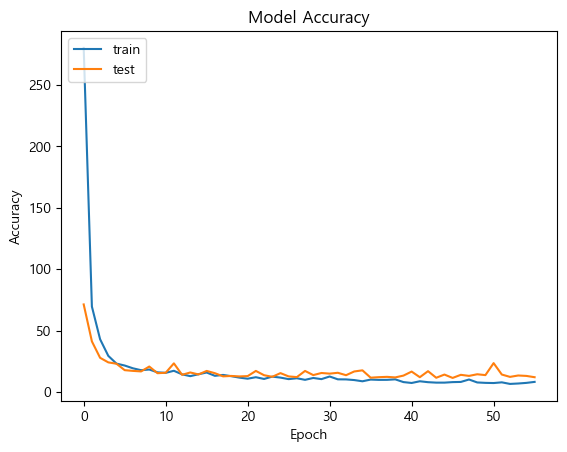

In [17]:
import matplotlib.pylab as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# 모델저장

path = "../_save/"

# model.save_weights(path+"save_weight2.h5")

In [13]:
# # 모델불러오기
# from tensorflow.keras.models import load_model

# path = "../_save/"

# # 가중치 불러오기는 모델이 저장 되어 있어야 가능함
# model.load_weights(path+"save_weight2.h5")

ValueError: Cannot assign value to variable ' dense_6/kernel:0': Shape mismatch.The variable shape (13, 32), and the assigned value shape (13, 50) are incompatible.

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_54 (Dense)            (None, 50)                700       
                                                                 
 dense_55 (Dense)            (None, 50)                2550      
                                                                 
 dense_56 (Dense)            (None, 50)                2550      
                                                                 
 dense_57 (Dense)            (None, 50)                2550      
                                                                 
 dense_58 (Dense)            (None, 50)                2550      
                                                                 
 dense_59 (Dense)            (None, 1)                 51  

In [20]:
# 평가 예측
loss = model.evaluate(x_test,y_test)

print("loss : ",loss)

5/5 [==============================] - 0s 2ms/step - loss: 21.2319
loss :  21.231895446777344
